In [49]:
import numpy as np
import numpy.linalg as la
import pandas as pd
import matplotlib.pyplot as plt

# Problem 1

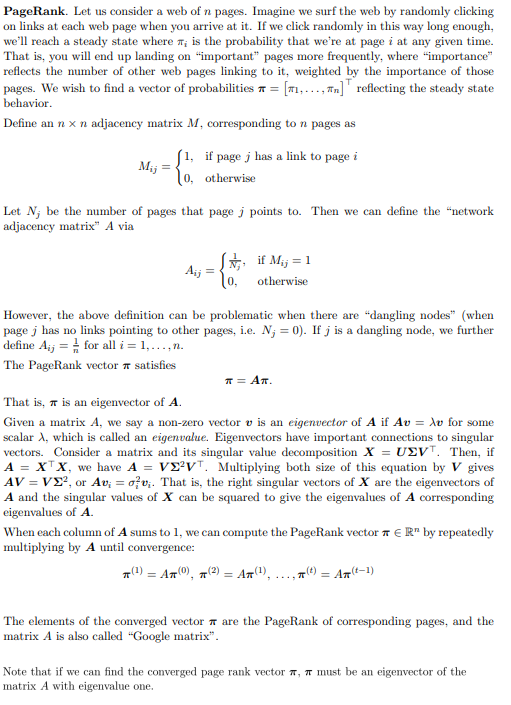

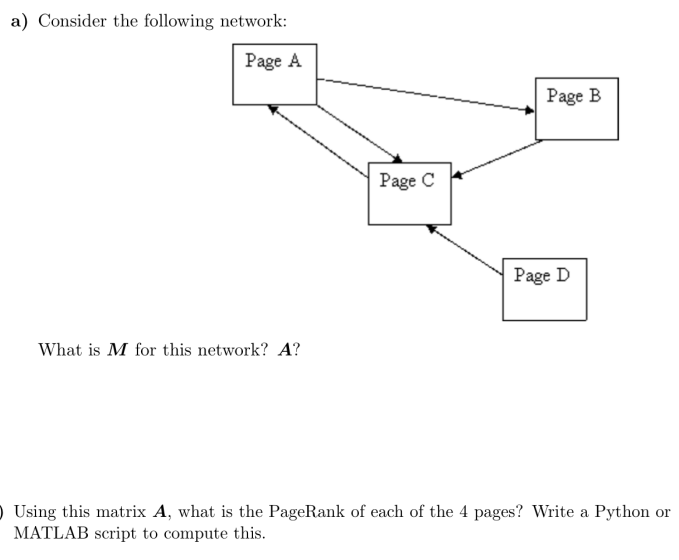

In [18]:
A = np.vstack([[0,0,1,0],[1/2,0,0,0],[1/2,1,0,1],[0,0,0,0]])
A

array([[0. , 0. , 1. , 0. ],
       [0.5, 0. , 0. , 0. ],
       [0.5, 1. , 0. , 1. ],
       [0. , 0. , 0. , 0. ]])

array([0.40000057, 0.19999981, 0.39999962, 0.        ])

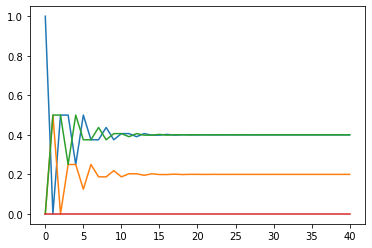

In [90]:
iters = 40

pi = np.vstack([1,0,0,0])
pi_list = pi
for i in range(iters):
    pi = A@pi
    pi_list = np.hstack([pi_list,pi])
for i in range(pi_list.shape[0]):
    plt.plot(range(iters+1),pi_list[i])
pi_list[:,40]

Part C

In [88]:
ones = np.array([[1]*4]).T
# ones

In [83]:
G = 0.8*(A) + (1-0.8)*(1/4)*ones@ones.T
G = G/G.sum(axis=0)
G

array([[0.05, 0.05, 0.85, 0.05],
       [0.45, 0.05, 0.05, 0.05],
       [0.45, 0.85, 0.05, 0.85],
       [0.05, 0.05, 0.05, 0.05]])

array([0.36320755, 0.19528302, 0.39150943, 0.05      ])

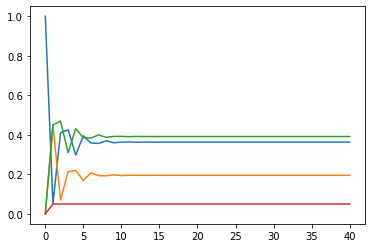

In [91]:
iters = 40

pi = np.vstack([1,0,0,0])
pi_list = pi
for i in range(iters):
    pi = G@pi
    pi_list = np.hstack([pi_list,pi])
for i in range(pi_list.shape[0]):
    plt.plot(range(iters+1),pi_list[i])
pi_list[:,40]

Part D

In [95]:
M = np.vstack([[1,1],[0,0]])
A = M
M

array([[1, 1],
       [0, 0]])

# Problem 2

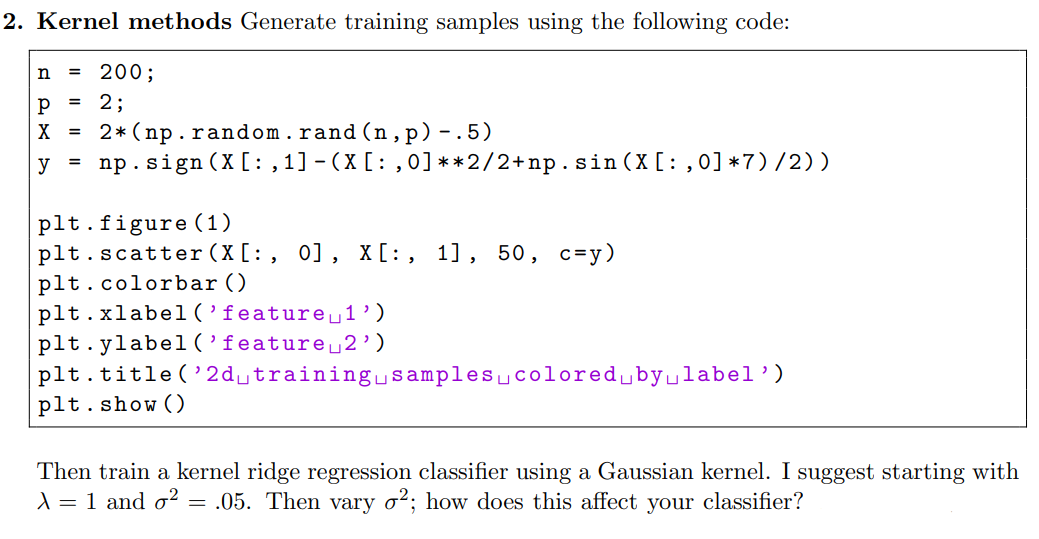

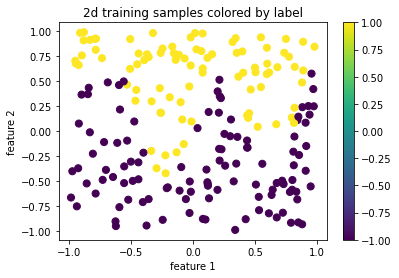

In [99]:
n = 200;
p = 2;
X = 2*(np.random.rand(n,p)-0.5)
y = np.sign(X[:,1] - (X[:,0]**2/2+np.sin(X[:,0]*7)/2))

plt.figure(1)
plt.scatter(X[:,0],X[:,1],50,c=y)
plt.colorbar()
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('2d training samples colored by label')
plt.show()

In [129]:
alpha.shape, K_test.shape, K.shape

((1, 200), (2000, 200), (200, 200))

In [183]:
(np.sign(yhat.T) != y).sum() / len(y)

0.025

In [184]:
def gausskernal_2(sigmasq = .05):
    sigmasq = sigmasq
    lam = 1

    norms2 = (np.array(la.norm(X, axis=1)).T)**2
    innerProds = X@X.T
    dist2 = np.matrix(norms2).T@np.ones([1,n]) + np.ones([n,1])@np.matrix(norms2) -2*innerProds
    K = np.exp(-dist2/(2*sigmasq))
    alpha = (la.inv(K + lam*np.identity(K.shape[0]))@y).T
    yhat = K@alpha

    y2 = np.array(np.sign(yhat))
    plt.figure(2)
    plt.scatter(X[:,0],X[:,1],50,c=y2)
    plt.colorbar()
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.title('2d training samples colored by PREDICTED label')
    plt.show()
    
    perr = (np.sign(yhat.T) != y).sum() / len(y)
    print("percent wrong = ",perr)

    ntest = 2000;
    Xtest = 2*(np.random.rand(ntest,p)-0.5)
    norms2_test = (np.array(la.norm(Xtest, axis=1)).T)**2
    innerProds_test = Xtest@X.T
    dist2_test = np.matrix(norms2_test).T@np.ones([1,n]) + np.ones([ntest,1])@np.matrix(norms2) - 2*innerProds_test
    K_test = np.exp(-dist2_test/(2*sigmasq))
    ytest = K_test@alpha

    plt.figure(3)
    plt.scatter(Xtest[:,0], Xtest[:,1],50,c=np.array(ytest))
    plt.colorbar()
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.title('2d test samples colored by PREDICTED label (before taking sign)')
    plt.show()

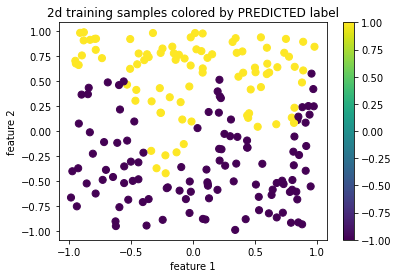

percent wrong =  0.0


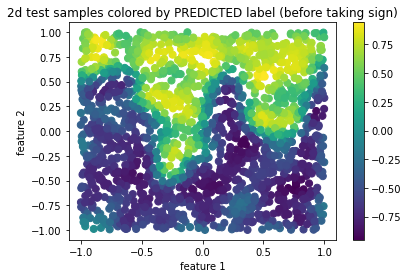

In [185]:
gausskernal_2(sigmasq=0.01)

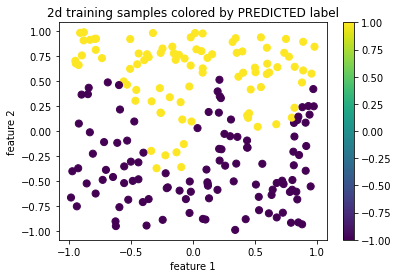

percent wrong =  0.025


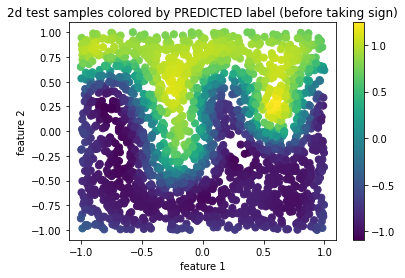

In [186]:
gausskernal_2()

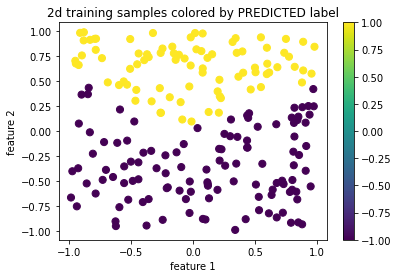

percent wrong =  0.12


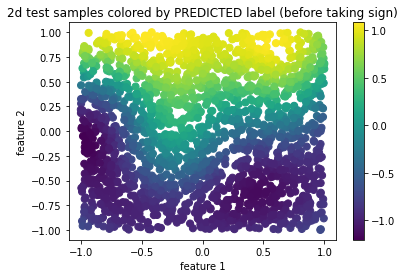

In [187]:
gausskernal_2(sigmasq=0.25)

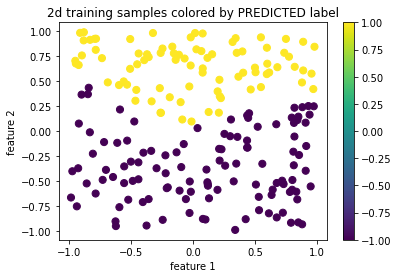

percent wrong =  0.125


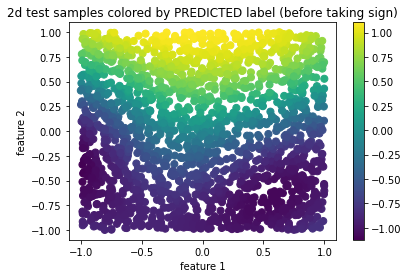

In [188]:
gausskernal_2(sigmasq=0.5)

*With increasing sigma^2, the number of wrong predicted labels increase. Smaller sigma^2 had more detailed, jagged borders (with an increased change of overfitting). Larger sigma^2 had smoother boarders (with an increased chance of underfitting).